<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Life Expectancy Data)

The dataset contains the health data of 2938 individuals useful for predicting the life expentency of the individuals. The features are related to economical factors, immunity realted factors, social factors and so on.

Attribute Information:

**Country:** Country of the recorded data

**Year:** Year of the recorded data

**Status:** Status of the country

**Life expectancy:** Life expectancy in age (target/dependent variable)

**Adult mortality:** Rate of adult mortality

**Infant deaths:** Number of Infant Deaths per 1000 population

**Alcohol:** Alcohol consumption (in litres of pure alcohol)

**Percentage expenditure:** Expenditure on health as a percentage of GDP

**Hepatitis B:** Hepatitis B immunization coverage among 1-year-olds (%)

**Measles:** Number of reported cases per 1000 population

**BMI:** Average BMI of entire population

**Under-five deaths:** Number of under-five deaths per 1000 population

**Polio:** Polio immunization coverage among 1-year-olds (%)

**Total expenditure:** Government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria:** DTP3 immunization coverage among 1-year-olds (%)

**HIV/AIDS:** Deaths per 1000 live births HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Thinness 1-19 years:** Prevalence of thinness for age 1 to 19 (%)

**Thinness 5-9 years:** Prevalence of thinness for age 5 to 9 (%)

**Income composition of resources:** Human Development Index in terms of income composition of resources

**Schooling:** Number of years of Schooling

**Import the required libraries**

In [137]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as exp

#### Load the life expectancy dataset and print the first five observations

In [138]:
df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the data type of each variable and if any variable is wrongly identified, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
df.info()
num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(exclude=np.number)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2922 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

In [140]:
len(num_df.columns)+len(cat_df.columns)

22

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Create a DataFrame containing the count and percentage of missing entries in each variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [141]:
df.isnull().sum().to_frame()

,0
Country,0
Year,0
Status,16
Life expectancy,10
Adult mortality,10
Infant deaths,0
Alcohol,194
Percentage expenditure,0
Hepatitis B,553
Measles,0


In [142]:
(df.isnull().sum()/len(df)*100).round(2).to_frame()

,0
Country,0.00
Year,0.00
Status,0.54
Life expectancy,0.34
Adult mortality,0.34
Infant deaths,0.00
Alcohol,6.60
Percentage expenditure,0.00
Hepatitis B,18.82
Measles,0.00


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3a. Are there any extreme values present in the government's total expenditure on health?
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

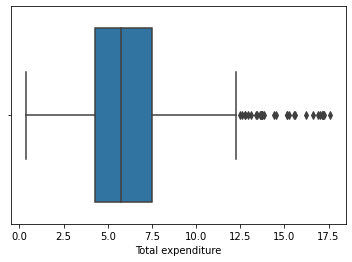

In [143]:
sns.boxplot(data=df,x='Total expenditure')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3b. Remove the outliers present in 'Total expenditure' using the quartiles of the variable	
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

D:\DSE\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


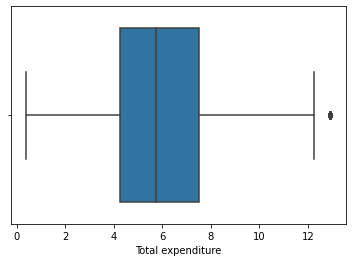

In [144]:
col=num_df.columns
i='Total expenditure'
q1=num_df[i].quantile(0.25)
q3=num_df[i].quantile(0.75)
iqr=q3-q1
ub=q3+ 1.5*iqr
lb=q1-1.5*iqr
uc=num_df[i].quantile(0.99)
lc=num_df[i].quantile(0.01)
ind1=num_df[num_df[i] > ub].index
ind2=num_df[num_df[i] < lb].index
num_df.loc[ind1,i]=uc
num_df.loc[ind2,i]=lc
sns.boxplot(data=num_df,x='Total expenditure')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Split the data such that 'X' will contain all the indepentdent variables and 'y' will contain the target variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Hint:** 'Life expectancy' is the target variable depending on the remaining variables.

In [145]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Split the independent variables into two sets with the proportion of 70:30</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [146]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.3,random_state=48)
print('Full data size:',df.shape)
print('Train data size:',train.shape)
print('test data size:',test.shape)

Full data size: (2938, 22)
Train data size: (2056, 22)
test data size: (882, 22)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. How would you treat the missing values in the variable 'GDP'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [147]:
df['GDP'].isnull().sum()/ len(df['GDP'])*100

15.248468345813478

<AxesSubplot:ylabel='Density'>

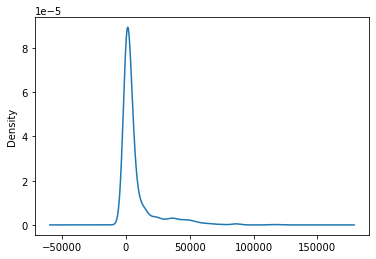

In [148]:
row_sum=df.isnull().sum(axis=1)  # Row wise missing value sum
row_sum[row_sum == df.shape[1]]
# dropping using row Approach
df_ra=df.dropna()
(len(df) - len(df_ra)) / len(df) *100
# we are loosing 37% of the data if we go by row approach 
# we cannot go in by column approach since non of the column 
df_ra1=df.dropna(subset=['GDP']) # dropping rows based on column mentioned in subset which has nan values.
df_ra1.isnull().sum()
df['GDP'].plot(kind='kde')

In [149]:
df.head()
df['GDP']=df['GDP'].fillna(df.groupby(by='Status')['GDP'].transform('mean'))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.There are 16 observations for which the status of the corresponding country is unknown, impute this status with an appropriate values</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [150]:
df.groupby(by='Status')['GDP'].mean()
# ind=df[df['Status'].isnull()].index
# ind

Status
Developed     21972.371208
Developing     4290.889280
Name: GDP, dtype: float64

In [151]:
ind=df[df['Status'].isnull()].index
for i in ind:
    if df.loc[i,'GDP'] >= 21972:
        df.loc[i,'Status']='Developed'
    else:
        df.loc[i,'Status']='Developing'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Define a function to find the extreme values in alcohol consumption
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [152]:
def extr(i):
    q1=num_df[i].quantile(0.25)
    q3=num_df[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+ 1.5*iqr
    lb=q1-1.5*iqr
    outlier=num_df[(num_df[i] > ub) | (num_df[i]<lb)]
    print('The values of outliers are given below\n',outlier[i])
    print('The number of outliers in the',i,len(outlier)/len(num_df)*100)

The values of outliers are given below
 Series([], Name: Alcohol, dtype: float64)
The number of outliers in the Alcohol 0.0


D:\DSE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


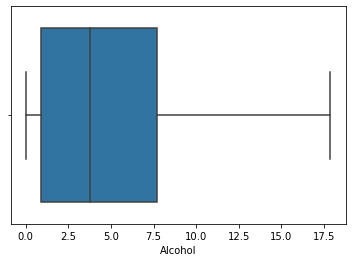

In [153]:
extr('Alcohol')
sns.boxplot(df['Alcohol'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a column 'Life_expectancy_level' such that it will contain three levels (High, Medium, Low) based on the life expectancy </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [154]:
l=df['Life expectancy'].quantile(0.25)
m=df['Life expectancy'].quantile(0.75)
ind=df['Life expectancy'].index
for i in ind:
    if df.loc[i,'Life expectancy'] < l:
        df.loc[i,'Life_expectancy_level']='Low'
    elif df.loc[i,'Life expectancy'] > l and df.loc[i,'Life expectancy'] < m:
        df.loc[i,'Life_expectancy_level']='Medium'
    else:
        df.loc[i,'Life_expectancy_level']='High'
        

In [155]:
df['Life_expectancy_level'].value_counts()

Medium    1461
High       748
Low        729
Name: Life_expectancy_level, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Check how life expectancy has changed over the years in China</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [159]:
xh=df[df['Country']=='China'][['Life expectancy','Year']]

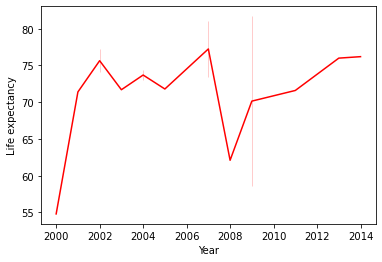

In [170]:
sns.lineplot(data=x,x='Year',y='Life expectancy',color='r')
plt.show()